#Redes neuronales con librerias

Hay multiples librerias que permiten hacer redes neuronales con suma facilidad:


1.   [Scikit-learn/sklearn](https://scikit-learn.org/stable/)
2.   [Tensorflow](https://www.tensorflow.org/?hl=es)
3.   [Keras](https://keras.io/)
4.   [Pytorch](https://pytorch.org/)
5.   [Nltk](https://www.nltk.org/)
6.   [Spacy](https://spacy.io/)

Puede encontrar mas informacion y librerias utiles en [este blog](https://www.iartificial.net/librerias-de-python-para-machine-learning/#TensorFlow)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Prediccion de valores

**Predecir los valores de una curva en x**

Para predecir valores se puede utilizar el [MLPRegresor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlpregressor#sklearn.neural_network.MLPRegressor), el cual requiere de un solver, la topologia de la red y una funcion de activacion.

**Optimizadores**

Entre los optimizadores hay:

lbfgs: Optimizador que utiliza el metodo cuasi-newton

sgd: Optimizador que utiliza el descenso del gradiente

adam: otro optimizador que utiliza descenso del gradiente

([Leer más](https://programmerclick.com/article/85911332311/)).

**Topologia**

La topologia de la red se refiere a la estructura de la red, esta puede describirse mediante una tupla que indique el numero de neuronas en las capas ocultas, las librerias toman de referencia el tamaño de la entrada y salida para la cantidad de neuronas en las capas de entrada y salida.

**Funciones de activacion**

Hay multiples funciones de activacion para solucionar distintos tipos de problemas, algunos de las funciones de activacion son:

identity: es una funcion que retorna el valor de entrada $f(x)=x$

logistic: es la funcion sigmoide que puede retornar valores continuos entre 0 y 1, $\sigma(x)=\frac{1}{1+e^{-x}}$

tanh: Es una funcion de tangente hiperbolica $f(x)=\tanh(x)$

relu: Es una funcion para la cual todas las entradas menores a 0 son 0, y para mayores a 0 es igual al valor de entrada
$f(x) = \left\{
  \begin{array}{lr}
    0 & : x < 0\\
    x & : x \ge 0
  \end{array}
\right.$


Score: 0.9999999999861995
[[6 3 4]]
[17.96892618 -5.31107416  3.03190624]


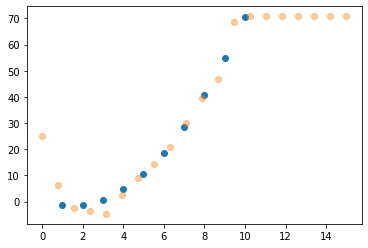

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

#dataset
x=np.array([1,2,3,4,5,6,7,8,9,10])
x=x[:,np.newaxis]
y=np.array([-1,-1,1,5,11,19,29,41,55,71])+0.3*np.random.randint(-1,1)

from sklearn.model_selection import train_test_split#modulo para separar los datos de entrenamiento y los de prueba
X, X_t, Y, Y_t=train_test_split(x,y)

#configuracion de la red
model=MLPRegressor(solver="lbfgs",
                   alpha=1e-5,#penalizacion
                   hidden_layer_sizes=(3,4,3), #topologia de las capas ocultas
                   random_state=1,
                   activation="tanh")
model.fit(X,Y)
print("Score:",model.score(X,Y))

print(X_t.T)
print(model.predict(X_t))

plt.scatter(x,y)

X_n=np.linspace(0,15,20)
X_n=X_n[:,np.newaxis]
plt.scatter(X_n,model.predict(X_n),alpha=.4)

**predecir funciones multivariadas**
En el caso anterior solo se hace con una variable pero para dos variables se puede de forma sencilla, solo necesita una matriz de tamaño $m\times n$ con $n=$numero de ejemplos y $m=$numero de parametros.

El tamaño de la salida es el mismo solo que con $n=$numero de salidas

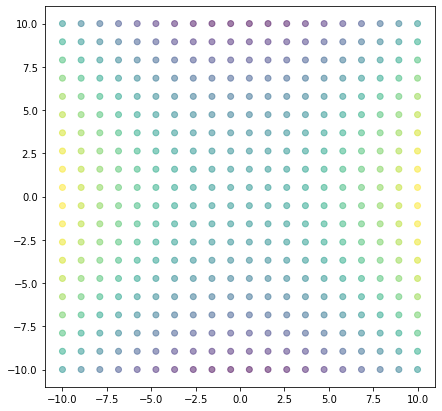

In [ ]:
w=np.linspace(-10,10,20)
X_=[[],[]]
y_=[]
for i in w:
  for j in w:
    X_[0].append(i)
    X_[1].append(j)
    y_.append((i**2)-(j**2))
del(w)
plt.figure(figsize=(7,7))
plt.scatter(X_[0],X_[1],c=y_,alpha=.5)


tamaño de la matriz (2, 400)
Score: 0.973847671843109


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


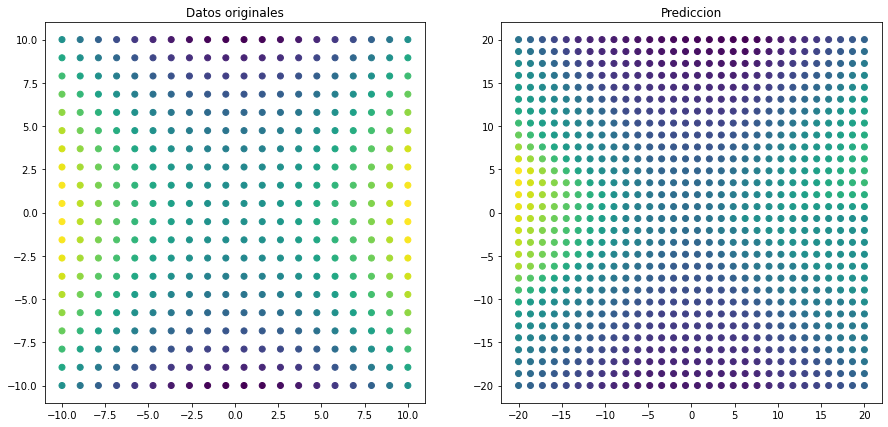

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

#dataset
x=np.array(X_)
#Necesita una matriz 400,2
print("tamaño de la matriz",x.shape)
x=x.T#traspuesta de x
y=np.array(y_)

from sklearn.model_selection import train_test_split#modulo para separar los datos de entrenamiento y los de prueba
X, X_t, Y, Y_t=train_test_split(x,y)

#configuracion de la red
model=MLPRegressor(solver="lbfgs",
                   alpha=1e-5,
                   hidden_layer_sizes=(10,15,10),
                   random_state=1,
                   activation="relu")#logistic, relu,tanh
model.fit(X,Y)
print("Score:",model.score(X,Y))

w=np.linspace(-20,20,30)
X_s=[[],[]]
for i in w:
  for j in w:
    X_s[0].append(i)
    X_s[1].append(j)

p=model.predict(np.array(X_s).T)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)

plt.title("Datos originales")
plt.scatter(x.T[0],x.T[1],c=y)
plt.subplot(1,2,2)

plt.title("Prediccion")
plt.scatter(X_s[0],X_s[1],c=p)
plt.show()


#print("Similitud coseno=",(y@p)/(pow(sum(y**2),1/2)*pow(sum(p**2),1/2))," -1 significa que no coincide y 1 es que coincide")



##Clasificacion

Hace referencia a la accion de agrupar o asignar un objeto/ dato a grupo llamado clase.

Es decir si se tiene perros, gatos y peces, esas son las clases y todo lo que derive de ellas son los objetos o datos que deben ser agrupadas en las mismas.

###Regresor como clasificador
Una forma de clasificar es utilizando un regresor como el usando anteriormente pero donde la y sea un valor que identifique a la clase que pertenece.

(-1.2136883543747798,
 1.202098998968273,
 -1.2152221970961656,
 1.2291748485626062)

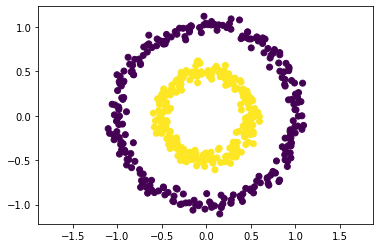

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_circles

n=500

x,y=make_circles(n_samples=n,factor=0.5,noise=0.05)
y=y[:,np.newaxis]
plt.scatter(x[:,0],x[:,1],c=y)
plt.axis("equal")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score: 0.9998172897971809


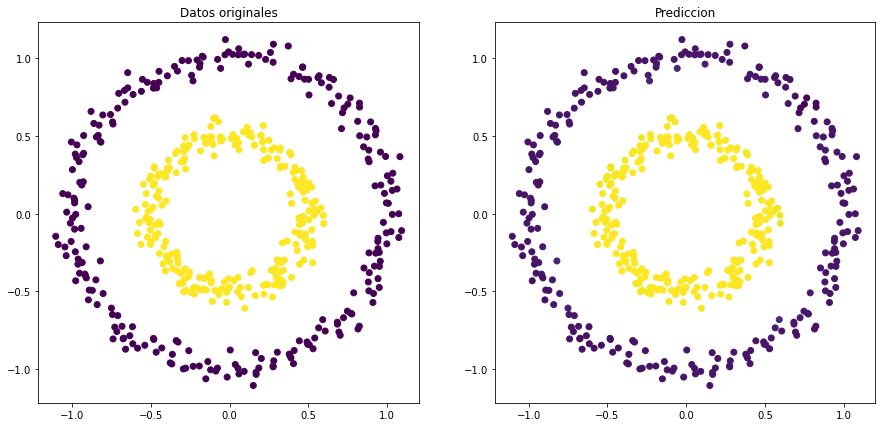

In [ ]:

from sklearn.model_selection import train_test_split#modulo para separar los datos de entrenamiento y los de prueba
X, X_t, Y, Y_t=train_test_split(x,y)

#configuracion de la red
model=MLPRegressor(solver="lbfgs",
                   alpha=1e-5,
                   hidden_layer_sizes=(15,15,10,5,15),
                   random_state=1,
                   activation="tanh")
model.fit(X,Y)
print("Score:",model.score(X,Y))

p=model.predict(x)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)

plt.title("Datos originales")
plt.scatter(x[:,0],x[:,1],c=y)
plt.subplot(1,2,2)

plt.title("Prediccion")
plt.scatter(x[:,0],x[:,1],c=p)
plt.show()


###Keras
Es la interfaz de alto nivel de tensorflow, con keras es facil generar una arquitectura para una red neuronal, en este caso será una red secuencial.

[Leer sobre el modelo de red neuronal secuencial](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr
lr = 0.2
nnpc = [5,10,1]
F_activacion=['relu','tanh','tanh']#sigmoid es equivalente a logistic de sklearn

model = kr.Sequential()#Genera una red neuronal sin capas, las capas son secuenciales
for i in range(len(nnpc)):
  model.add(kr.layers.Dense(nnpc[i], activation=F_activacion[i]))#Añade una capa densa de nnpc[i] neuronas con F_activacion[i] como funcion de activacion

model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=lr), metrics=['acc'])#metrics, mide la precision y las perdidas, o sea que tanto falla y que tanto acierta
 
model.fit(x, y, epochs=1000)

(500, 1)


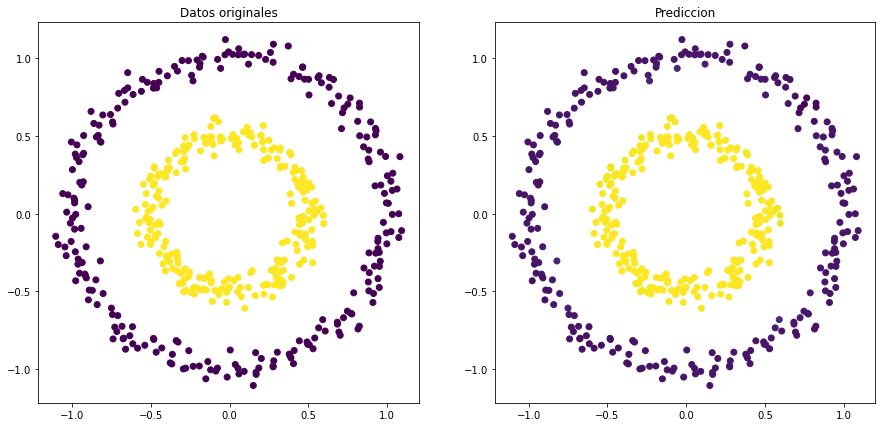

In [ ]:
import matplotlib.pyplot as plt

p=model.predict(x)
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title("Datos originales")
plt.scatter(x[:,0],x[:,1],c=y)

plt.subplot(1,2,2)
plt.title("Prediccion")
print(y.shape)
plt.scatter(x[:,0],x[:,1],c=p)
plt.show()

####Clasificador probabilistico

In [ ]:
Y_1=np.array([(1 if i==0 else 0) for i in y.T[0]])
Y_2=np.array([(1 if i==1 else 0) for i in y.T[0]])

In [ ]:
Y_3=np.array([Y_1,Y_2])

In [ ]:
import tensorflow as tf
import tensorflow.keras as kr
lr = 0.2
nnpc = [5,10,2]
F_activacion=['relu','tanh','sigmoid']#sigmoid es equivalente a logistic de sklearn

model = kr.Sequential()#Genera una red neuronal sin capas, las capas son secuenciales
for i in range(len(nnpc)):
  model.add(kr.layers.Dense(nnpc[i], activation=F_activacion[i]))#Añade una capa densa de nnpc[i] neuronas con F_activacion[i] como funcion de activacion

model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=lr), metrics=['acc'])#metrics, mide la precision y las perdidas, o sea que tanto falla y que tanto acierta
 
model.fit(x, Y_3.T, epochs=1000)

In [ ]:
P=model.predict(x)

<BarContainer object of 2 artists>

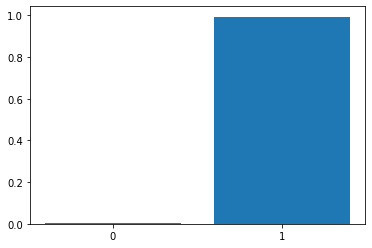

In [ ]:
#@title Probabilidad { run: "auto" }
N = 228 #@param {type:"slider", min:0, max:300, step:1}
plt.bar(["0","1"],P[N])

In [ ]:
w=[np.argmax(i) for i in P]

(500, 1)


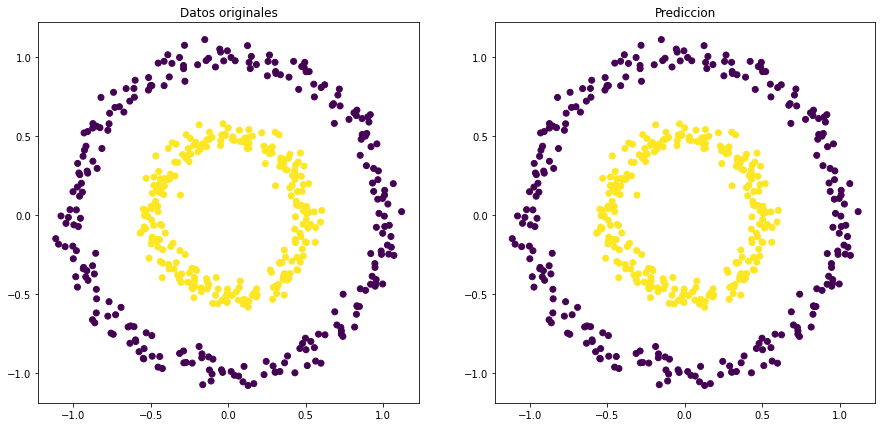

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.title("Datos originales")
plt.scatter(x[:,0],x[:,1],c=y)

plt.subplot(1,2,2)
plt.title("Prediccion")
print(y.shape)
plt.scatter(x[:,0],x[:,1],c=w)
plt.show()

#Ejemplo con SKlearn de clasificación y guardado del modelo

In [ ]:

#Libreria para extaer los datos
import pandas as pd
#Libreria requisito para manejo numerico de sklearn
import numpy as np
#Modelo regresor para poder hacer la red
from sklearn.neural_network import MLPRegressor
#Módulo para separar los datos
from sklearn.model_selection import train_test_split
#Libreria para guardar el modelo
import joblib

#Voy a utilizar el dataset https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud
'''
La cabecera de los datos es:
    distance_from_home
    distance_from_last_transaction
    ratio_to_median_purchase_price
    repeat_retailer
    used_chip
    used_pin_number
    online_order
    fraud
'''
#Para cargar los datos
df = pd.read_csv("./card_transdata.csv")

#La libreria según la documentacion requiere utilizar arreglos para guardar la matriz de entrada y de salida

#Seleccion de los valores de la tabla excepto la ultima columna
#La entrada x es una matriz MxN, N=Numero de ejemplos y M=Entradas
'''
Solo se van a utilizar las siguientes caracteristicas:
ratio_to_median_purchase_price: Ratio medio de compra
repeat_retailer : Minorista habitual
used_chip : Se utilizó chip?
used_pin_number : Se utilizó numero pin?
online_order : Compra online?
'''
x = np.array(df.iloc[:-1, 2:-1], dtype="int64").T

#Seleccion de la ultima columna
y = np.array(df["fraud"], dtype="int64")[:-1]

#Separa los datos en datos de entrenamiento y datos de prueba
X, X_t, Y, Y_t = train_test_split(x.T, y)

#Verifica si ya se entreno previemente un modelo
try:
  modela = joblib.load('modelo_entrenadoa.pkl')
  modelb = joblib.load('modelo_entrenadob.pkl')
except:
  #configuracion de la red, Calculará la probabilidad de que se trate de un fraude.

  modela = MLPRegressor(
    solver="adam",  #Optimizador
    alpha=1e-5,  #Paso de optimización
    hidden_layer_sizes=(10, 5, 2),  #Capas de la red
    activation="logistic")

  #Entrenamiento de la red
  modela.fit(X, Y)
  #Puntuación de la red, mientras mas cercano a 1 es mejor
  print("Score:", modela.score(X, Y))

  #Para guardar el modelo si la puntuación es minimo .7
  if modela.model.score(X, Y) > .7:
    joblib.dump(modela, 'modelo_entrenadoa.pkl')

  #configuracion de la red, Calculará la probabilidad inversa de que se trate de un fraude.
  print("a")
  modelb = MLPRegressor(
    solver="adam",  #Optimizador
    alpha=1e-5,  #Paso de optimización
    hidden_layer_sizes=(10, 5, 2),  #Capas de la red
    activation="logistic")

  #Modificación de la salida
  Y=np.ones(len(Y))-Y
  #Entrenamiento de la red
  modelb.fit(X, Y)
  #Puntuación de la red, mientras mas cercano a 1 es mejor
  
  print("Score:", modelb.score(X, Y))

  #Para guardar el modelo si la puntuación es minimo .7
  if modelb.score(X, Y) > .7:
    joblib.dump(modelb, 'modelo_entrenadob.pkl')


entrada=np.array([[int(input(i + ">>"))for i in ("Ratio medio de compra", "Minorista habitual", "Se utilizó chip?", "Se utilizó numero pin?", "Compra online?")]])

#Primera predicción y Segúnda prediccion
prediccion = np.array([modela.predict(entrada),modelb.predict(entrada)])
#Se aplica una distribución de probabilidad

prediccion=pow(np.e,prediccion)/sum(pow(np.e,prediccion))


##Para retornar una respuesta al usuario se puede verificar cual es la probabilidad mayor con ayuda de argmax
print(["Fraude","No es fraude"][np.argmax(prediccion)])

Ratio medio de compra>>1
Minorista habitual>>0
Se utilizó chip?>>1
Se utilizó numero pin?>>1
Compra online?>>1
No es fraude
